## We ran the wind experiments for an addition year to address Reviewer #2's concern about the model not having time to reach equilibrium. Results for both years are presented in the figures below

In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from salishsea_tools import bio_tools as bt, places
import xarray as xr
import os
import glob
%matplotlib inline

#### SST Summary

In [2]:
WY_SST_Orig=[ 6.66574269,  5.18524643,  7.24007046, 10.16174981, 14.03568474,
       17.7114818 , 20.61275981, 20.03991294, 16.73050814, 11.58581398,
        8.60023705,  6.47922814]

In [3]:
WY_SST_Winds_Y1=[ 6.94768824,  5.03149186,  6.92260036, 10.4741395 , 13.69086769,
       17.51762955, 18.32682018, 18.80116005, 16.19822578, 10.88716039,
        8.96325978,  6.76106302]

In [4]:
WY_SST_Winds_Y2=[6.9918339 ,  4.87760953,  6.92713677, 10.46009192, 13.7046104 ,
       17.54544225, 18.26914089, 18.79165202, 16.20215053, 11.5281496 ,
        8.907651  ,  6.72630295]

#### Surface PAR Summary

In [5]:
WY_PAR_Orig=[ 15.32197896,  25.46956689,  53.23312183,  62.55681691,
        90.94807552, 103.07397733,  94.85927622,  80.537624  ,
        51.4272268 ,  31.57661734,  20.31429578,   8.03365991]

In [6]:
WY_PAR_Winds_Y1=[ 15.33108848,  25.43487056,  53.40414242,  62.65396427,
        90.50300235, 103.02960905,  93.25852068,  79.68039158,
        51.27869687,  27.85621855,  20.32929689,   8.03467567]

In [7]:
WY_PAR_Winds_Y2=[15.33515415,  25.42600707,  53.61127559,  62.52625893,
        90.67276561, 103.08794134,  93.35497548,  79.8300606 ,
        51.20661886,  31.57126629,  20.32804855,   8.03418024]

#### Halocline Summary

In [8]:
WY_Halo_Orig=[0.58505033, 0.30151663, 0.77532729, 1.16814402, 1.79678101,
       2.71955474, 3.0706298 , 1.97864692, 1.54219058, 0.69132991,
       1.47439586, 0.85661952]

In [9]:
WY_Halo_Winds_Y1=[0.27275877, 0.43238446, 0.42162363, 1.29093306, 1.82034273,
       2.08958861, 1.36382405, 1.45949038, 1.19413448, 1.26065329,
       0.80995226, 0.6541769 ]

In [10]:
WY_Halo_Winds_Y2=[0.28199024, 0.59130768, 0.38744025, 1.32793922, 1.56409625,
       1.90094734, 1.20498036, 1.51444197, 1.18042918, 1.23641435,
       0.78096402, 0.66907514]

### Nitrate Summary

In [11]:
WY_Orig_N=[23.64834195, 22.38691698, 16.99383033,  7.63730902,  4.96273598,
        1.56547187,  1.23107567,  1.5230891 ,  7.95614177, 16.79074658,
       19.52305174, 21.62759183]

In [12]:
WY_Winds_N_Y1=[23.80685063, 22.63941779, 18.68073904,  6.54336744,  5.49402545,
        1.67369885,  2.81440205,  3.81694601, 11.47654414, 19.18559774,
       21.74671523, 22.24619177]

In [13]:
WY_Winds_N_Y2=[24.01221824, 22.64648805, 19.66718764,  6.78004558,  5.26884147,
        1.58280993,  2.64396793,  4.40121619, 10.86783189, 18.48636701,
       21.81966261, 22.41982827]

#### Silicon Summary

In [14]:
WY_Orig_Si=[48.06238141, 49.17238747, 41.59249494, 18.0018168 ,  5.46358173,
       12.1107789 , 19.87997362, 28.03714477, 36.00806573, 41.96864256,
       44.54149611, 47.0336623]

In [15]:
WY_Winds_Si_Y1=[47.79922893, 49.19336588, 44.03685091, 16.95528149,  8.04410933,
       11.85676838, 23.22130531, 29.99828923, 38.12645109, 42.5020271 ,
       45.51880128, 47.52354357]

In [16]:
WY_Winds_Si_Y2=[48.43452448, 49.61876556, 45.73837801, 18.171402  ,  6.93379184,
       11.62316049, 21.83954572, 28.89856199, 37.23135684, 41.80189459,
       45.4518115 , 47.72926141]

#### Diatom Summary

In [17]:
WY_Diat_Orig=[ 0.59377227,  0.33091437, 19.3666898 , 35.47432309, 28.11495472,
       11.36745035,  4.92340905,  1.20478411,  0.23649318,  0.35289763,
        0.89988317,  0.59305295]

In [18]:
WY_Diat_Winds_Y1=[ 0.60027175,  0.33941166, 15.44437578, 34.041008  , 34.61807217,
       13.45235309,  5.03345856,  1.61639881,  0.2838087 ,  0.42158384,
        0.73749187,  0.46614534]

In [19]:
WY_Diat_Winds_Y2=[0.30559538,  0.21289923, 11.20923559, 34.87049436, 33.33948948,
       12.34872808,  5.54786994,  1.98130441,  0.31414584,  0.33929065,
        0.75150847,  0.48240029]

Text(-0.5, 41, '(f)')

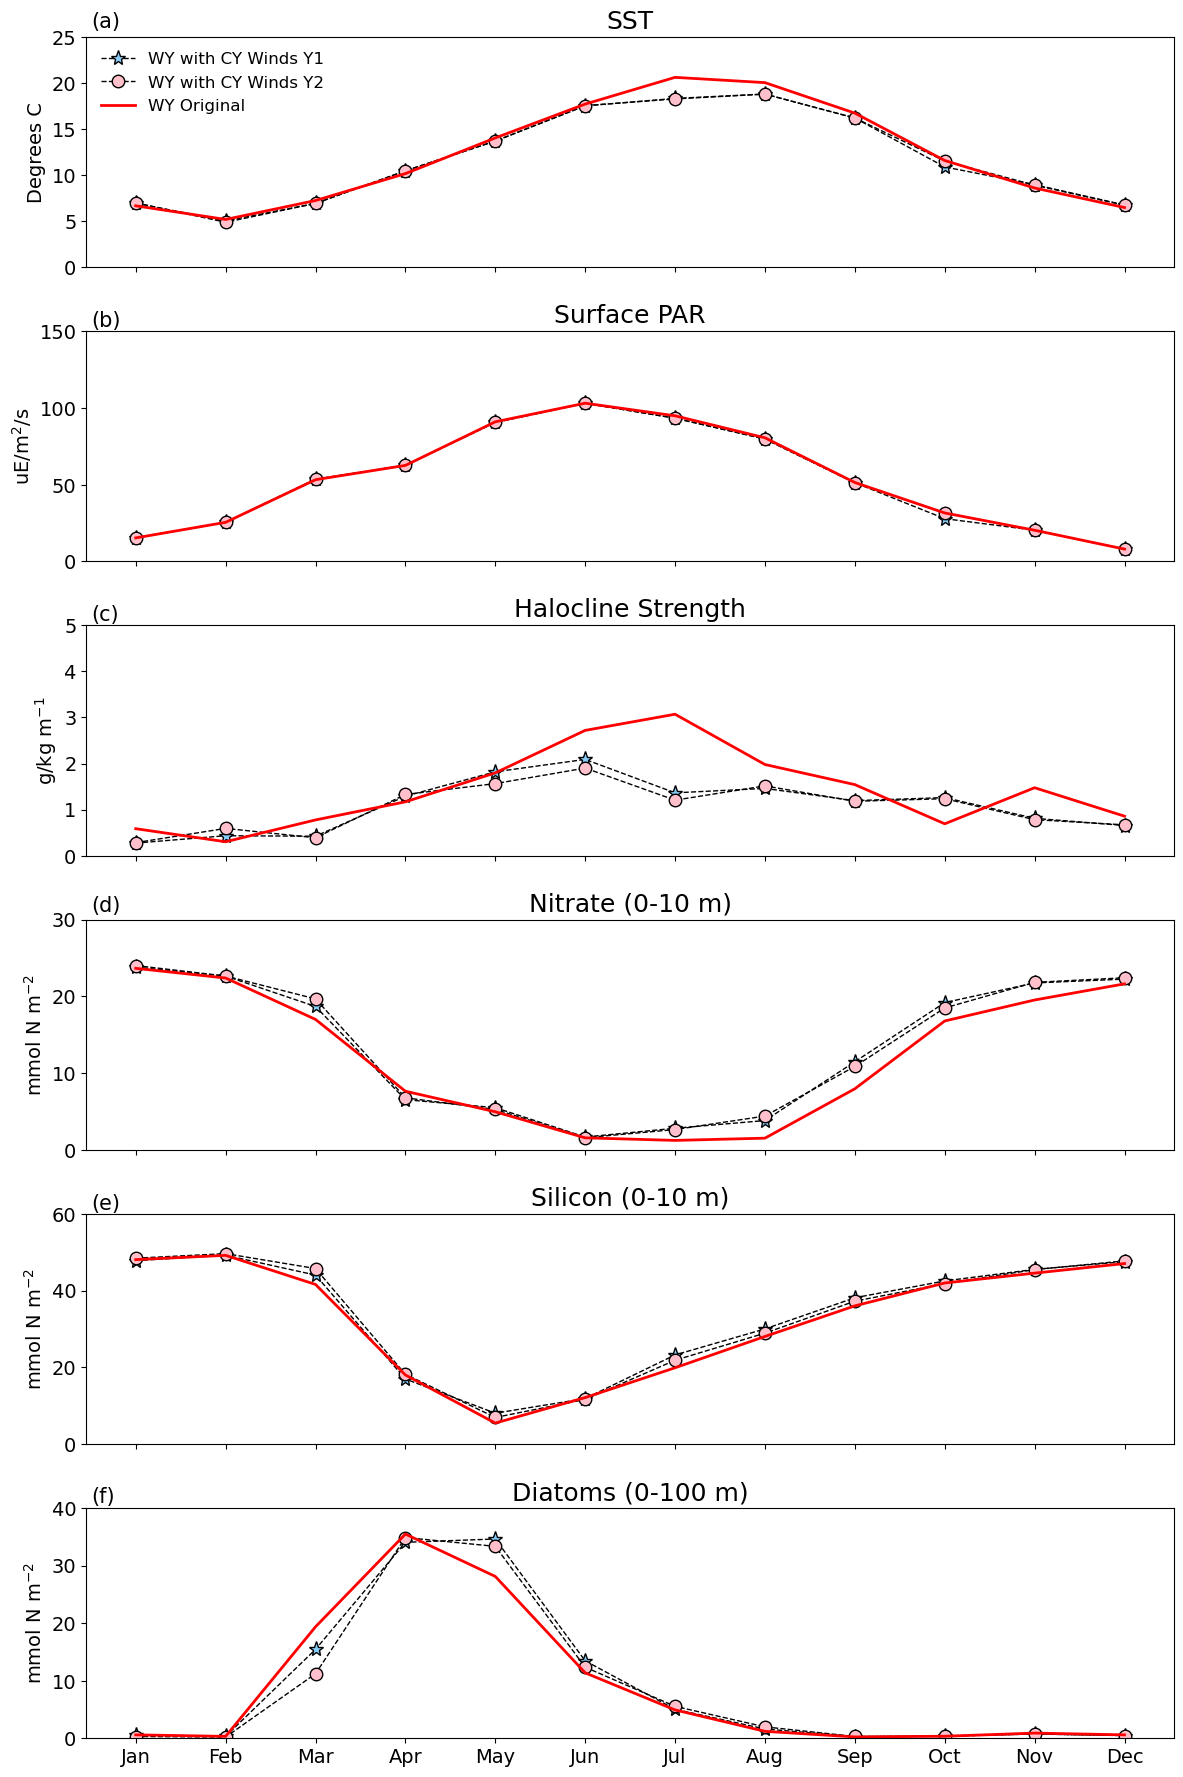

In [21]:
fig,ax=plt.subplots(6,1,figsize=(12,18))

fig.tight_layout(pad=2.5)

months=np.arange(1,13)
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]


ax[0].plot(xticks,WY_SST_Winds_Y1,'--',marker='*',markersize=11,markerfacecolor='lightskyblue',linewidth=1,color='k',label='WY with CY Winds Y1')
ax[0].plot(xticks,WY_SST_Winds_Y2,'--',marker='o',markersize=9,markerfacecolor='pink',linewidth=1,color='k',label='WY with CY Winds Y2')
ax[0].plot(xticks,WY_SST_Orig,'-',color='r',linewidth=2,label='WY Original')

ax[0].legend(frameon=False,loc=2,fontsize=12)
ax[0].set_ylabel('Degrees C',fontsize=14)
ax[0].set_xlabel('')
ax[0].set_ylim(0,25)
ax[0].set_title('SST',fontsize=18)
ax[0].xaxis.set_tick_params(labelsize=14)
ax[0].yaxis.set_tick_params(labelsize=14)
ax[0].set_xticklabels([])
ax[0].text(-.5, 26, '(a)', fontsize=15,  color='k')


ax[1].plot(xticks,WY_PAR_Winds_Y1,'--',marker='*',markersize=11,markerfacecolor='lightskyblue',linewidth=1,color='k',label='WY with CY Winds Y1')
ax[1].plot(xticks,WY_PAR_Winds_Y2,'--',marker='o',markersize=9,markerfacecolor='pink',linewidth=1,color='k',label='WY with CY Winds Y2')
ax[1].plot(xticks,WY_PAR_Orig,'-',color='r',linewidth=2,label='WY Original')
ax[1].legend((),frameon=False)
ax[1].set_ylabel('uE/m$^{2}$/s',fontsize=14)
ax[1].set_xlabel('')
ax[1].set_ylim(0,150)
ax[1].set_title('Surface PAR',fontsize=18)
ax[1].xaxis.set_tick_params(labelsize=14)
ax[1].yaxis.set_tick_params(labelsize=14)
ax[1].set_xticklabels([])
ax[1].text(-.5, 153, '(b)', fontsize=15,  color='k')


ax[2].plot(xticks,WY_Halo_Winds_Y1,'--',marker='*',markersize=11,markerfacecolor='lightskyblue',linewidth=1,color='k',label='WY with CY Winds Y1')
ax[2].plot(xticks,WY_Halo_Winds_Y2,'--',marker='o',markersize=9,markerfacecolor='pink',linewidth=1,color='k',label='WY with CY Winds Y2')
ax[2].plot(xticks,WY_Halo_Orig,'-',color='r',linewidth=2,label='WY Original')
ax[2].legend((),frameon=False)
ax[2].set_ylabel('g/kg m$^{-1}$',fontsize=14)
ax[2].set_xlabel('')
ax[2].set_ylim(0,5)
ax[2].set_title('Halocline Strength',fontsize=18)
ax[2].xaxis.set_tick_params(labelsize=14)
ax[2].yaxis.set_tick_params(labelsize=14)
ax[2].set_xticklabels([])
ax[2].text(-.5, 5.1, '(c)', fontsize=15,  color='k')


ax[3].plot(xticks,WY_Winds_N_Y1,'--',marker='*',markersize=11,markerfacecolor='lightskyblue',linewidth=1,color='k',label='WY with CY Winds Y1')
ax[3].plot(xticks,WY_Winds_N_Y2,'--',marker='o',markersize=9,markerfacecolor='pink',linewidth=1,color='k',label='WY with CY Winds Y2')
ax[3].plot(xticks,WY_Orig_N,'-',color='r',linewidth=2,label='WY Original')
ax[3].legend((),frameon=False)
ax[3].set_ylabel('mmol N m$^{-2}$',fontsize=14)
ax[3].set_xlabel('')
ax[3].set_ylim(0,30)
ax[3].set_title('Nitrate (0-10 m)',fontsize=18)
ax[3].xaxis.set_tick_params(labelsize=14)
ax[3].yaxis.set_tick_params(labelsize=14)
ax[3].set_xticklabels([])
ax[3].text(-.5, 31, '(d)', fontsize=15,  color='k')


ax[4].plot(xticks,WY_Winds_Si_Y1,'--',marker='*',markersize=11,markerfacecolor='lightskyblue',linewidth=1,color='k',label='WY with CY Winds Y1')
ax[4].plot(xticks,WY_Winds_Si_Y2,'--',marker='o',markersize=9,markerfacecolor='pink',linewidth=1,color='k',label='WY with CY Winds Y2')
ax[4].plot(xticks,WY_Orig_Si,'-',color='r',linewidth=2,label='WY Original')

ax[4].legend((),frameon=False)
ax[4].set_ylabel('mmol N m$^{-2}$',fontsize=14)
ax[4].set_xlabel('')
ax[4].set_ylim(0,60)
ax[4].set_title('Silicon (0-10 m)',fontsize=18)
ax[4].xaxis.set_tick_params(labelsize=14)
ax[4].yaxis.set_tick_params(labelsize=14)
ax[4].set_xticklabels([])
ax[4].text(-.5, 61, '(e)', fontsize=15,  color='k')


ax[5].plot(xticks,WY_Diat_Winds_Y1,'--',marker='*',markersize=11,markerfacecolor='lightskyblue',linewidth=1,color='k',label='WY with CY Winds Y1')
ax[5].plot(xticks,WY_Diat_Winds_Y2,'--',marker='o',markersize=9,markerfacecolor='pink',linewidth=1,color='k',label='WY with CY Winds Y2')
ax[5].plot(xticks,WY_Diat_Orig,'-',color='r',linewidth=2,label='WY Original')

ax[5].legend((),frameon=False)
ax[5].set_ylabel('mmol N m$^{-2}$',fontsize=14)
ax[5].set_xlabel('')
ax[5].set_ylim(0,40)
ax[5].set_title('Diatoms (0-100 m)',fontsize=18)
ax[5].xaxis.set_tick_params(labelsize=14)
ax[5].yaxis.set_tick_params(labelsize=14)
ax[5].text(-.5, 41, '(f)', fontsize=15,  color='k')

#ax[5].set_xticklabels([])

#fig.suptitle('Warm Year Experiments')


#plt.savefig('Figure7_WYExperiments_Revised.png', bbox_inches='tight',dpi=1000,transparent=False)